In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 14.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
from ultralytics import YOLO
import torch
import os

dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = YOLO('yolov8s.yaml')
model.to(dev)

data_path = os.path.join(ROOT_DIR, 'data.yaml')

results = model.train(data=os.path.join(ROOT_DIR, 'data.yaml'), epochs=500)

In [ ]:
import shutil
import os

destination_dir = "/content/gdrive/MyDrive/runs/"

# Controlla se la directory esiste e rimuovila se necessario
if os.path.exists(destination_dir):
    shutil.rmtree(destination_dir)

# Ora copia la directory runs nella drive
shutil.copytree("/content/runs", destination_dir)


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs'

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/gdrive/MyDrive/runs/detect/train/weights/best.pt')

metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

In [ ]:
from ultralytics import YOLO
import numpy as np

model = YOLO('/content/gdrive/MyDrive/Università/coin detection/Runs_dataset/runs/detect/train/weights/best.pt')

metrics = model.val()

precision = metrics.box.p
recall = metrics.box.r
f1_score = metrics.box.f1

print("Precision per classe:", precision)
print("Recall per classe:", recall)
print("F1 score per classe:", f1_score)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f1 = np.mean(f1_score)
accuracy = (mean_precision * mean_recall) / (mean_precision + mean_recall)

print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 83.0MB/s]
val: Scanning /content/gdrive/My Drive/Università/coin detection/Dataset/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:11<00:00, 17.81s/it]


                   all         50        310       0.55      0.686      0.672      0.418
                   10c         26         29      0.323      0.828      0.582      0.342
                    1c         35         50      0.706       0.72      0.788      0.453
                    1e         24         30        0.7      0.778      0.844      0.544
                   20c         33         38       0.43      0.684        0.5      0.331
                    2c         32         46      0.461      0.674      0.606      0.311
                    2e         26         40      0.704      0.715       0.86      0.637
                   50c         25         32      0.461      0.531      0.543       0.32
                    5c         31         45      0.617      0.556      0.653      0.405
Speed: 10.7ms preprocess, 1076.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
Precision per classe: [    0.32282     0.70562     0.69987     0.43021      0.46


image 1/1 /content/gdrive/MyDrive/Università/coin detection/Dataset/test/images/test_7_jpg.rf.d1b7ddf00d6d1033b920616a577339aa.jpg: 640x640 5 10cs, 3 1cs, 6 1es, 2 20cs, 1 2c, 1 2e, 2 50cs, 10 5cs, 762.8ms
Speed: 10.7ms preprocess, 762.8ms inference, 30.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


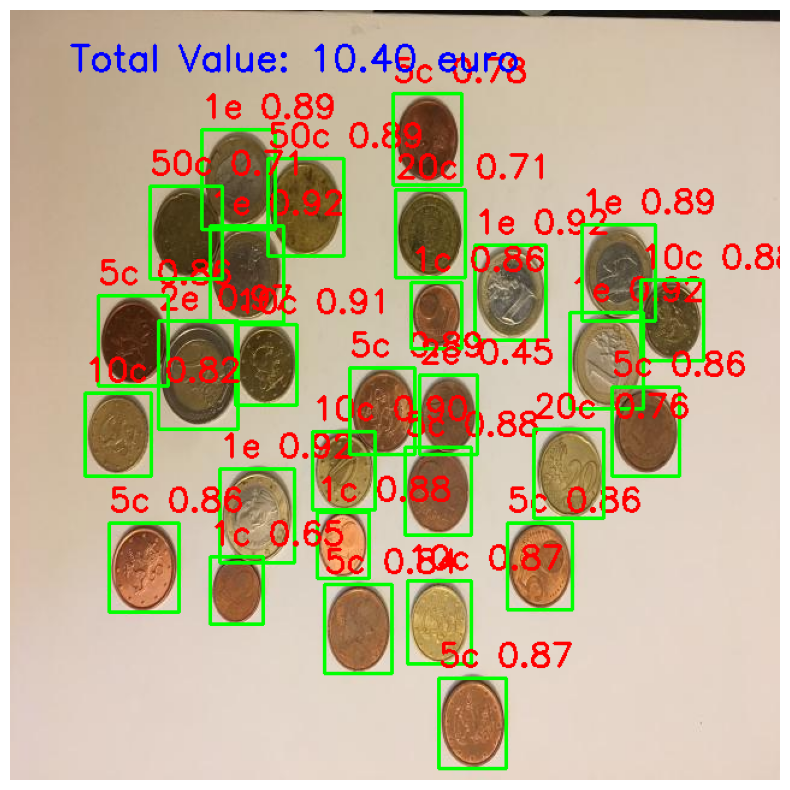

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Carica il modello
model = YOLO("/content/gdrive/MyDrive/Università/coin detection/Runs_dataset/runs/detect/train/weights/best.pt")

# Percorso dell'immagine di input
path = r'/content/gdrive/MyDrive/Università/coin detection/Dataset/test/images/test_7_jpg.rf.d1b7ddf00d6d1033b920616a577339aa.jpg'

# Esegui la previsione con Non-Maximum Suppression (NMS)
results = model.predict(source=path, save=True, save_txt=True, conf=0.25, iou=0.45)

# Carica l'immagine con OpenCV e converti in RGB
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dizionario per il valore delle monete
class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0

# Conta delle classi
class_counts = {key: 0 for key in class_values.keys()}

# Funzione per calcolare l'intersezione su unione (IoU)
def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

# Applica NMS manualmente
boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

# Ordina le box per confidenza
boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

# Analizza i risultati delle previsioni
for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:
    value = class_values[class_name]
    total_value += value
    class_counts[class_name] += 1  # Incrementa il conteggio della classe
    label = f'{class_name} {confidence:.2f}'

    # Disegna la bounding box e l'etichetta sull'immagine
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Aggiungi il totale sull'immagine
total_label = f'Total Value: {total_value:.2f} euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Visualizza l'immagine
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# Stampa i conteggi delle classi e il valore totale
print("Conteggi delle classi:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\nValore totale delle monete: €{total_value:.2f}")


Singola Moneta


In [ ]:
pip install pandas pillow


In [ ]:
import os
import pandas as pd
from PIL import Image
import json

# Leggi il file CSV
csv_path = '/content/gdrive/MyDrive/Università/coin_recognition_csv.csv'
df = pd.read_csv(csv_path)

# Cartella delle immagini
images_folder = '/content/gdrive/MyDrive/Università/Image'

# Cartella per le etichette
labels_folder = '/content/gdrive/MyDrive/Università/labels'
os.makedirs(labels_folder, exist_ok=True)  # Crea la cartella se non esiste

# Mappatura delle classi
class_mapping = {
    "1c": 0,
    "2c": 1,
    "5c": 2,
    "10c": 3,
    "20c": 4,
    "50c": 5,
    "1e": 6,
    "2e": 7
}

# Funzione per convertire i bounding box
def convert_bbox(size, box):
    dw = 1. / size[0]
    dh = 1. / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

# Estrai e converti le informazioni
for index, row in df.iterrows():
    filename = row['filename']
    image_path = os.path.join(images_folder, filename)

    # Stampa il percorso dell'immagine per debug
    print(f"Processing {image_path}")

    # Controlla se il file esiste
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    with Image.open(image_path) as img:
        width, height = img.size

    # Estrai i bounding box dal JSON
    try:
        shape_attributes = json.loads(row['region_shape_attributes'])
        print(f"Shape attributes: {shape_attributes}")  # Debug print

        x = shape_attributes.get('x')
        y = shape_attributes.get('y')
        width_box = shape_attributes.get('width')
        height_box = shape_attributes.get('height')

        if x is None or y is None or width_box is None or height_box is None:
            print(f"Missing bounding box data in row {index}")
            continue

        xmin = x
        xmax = x + width_box
        ymin = y
        ymax = y + height_box

        # Converti i bounding box
        bbox = convert_bbox((width, height), (xmin, xmax, ymin, ymax))

        # Estrai la classe dal JSON
        region_attributes = json.loads(row['region_attributes'])
        class_label = region_attributes['Class-labels']
        class_id = class_mapping[class_label]

        # Scrivi le informazioni in un file di testo
        txt_path = os.path.join(labels_folder, filename.replace('.jpg', '.txt'))
        with open(txt_path, 'w') as f:
            f.write(f"{class_id} {' '.join(map(str, bbox))}\n")

    except json.JSONDecodeError as e:
        print(f"JSON decode error in row {index}: {e}")
        continue
    except KeyError as e:
        print(f"KeyError in row {index}: {e}")
        continue


Processing /content/gdrive/MyDrive/Università/Image/3.jpg
Shape attributes: {'name': 'rect', 'x': 28, 'y': 30, 'width': 96, 'height': 96}
Processing /content/gdrive/MyDrive/Università/Image/5.jpg
Shape attributes: {'name': 'rect', 'x': 25, 'y': 29, 'width': 100, 'height': 100}
Processing /content/gdrive/MyDrive/Università/Image/7.jpg
Shape attributes: {'name': 'rect', 'x': 28, 'y': 26, 'width': 98, 'height': 99}
Processing /content/gdrive/MyDrive/Università/Image/9.jpg
Shape attributes: {'name': 'rect', 'x': 30, 'y': 26, 'width': 98, 'height': 97}
Processing /content/gdrive/MyDrive/Università/Image/11.jpg
Shape attributes: {'name': 'rect', 'x': 26, 'y': 25, 'width': 100, 'height': 101}
Processing /content/gdrive/MyDrive/Università/Image/13.jpg
Shape attributes: {'name': 'rect', 'x': 27, 'y': 22, 'width': 101, 'height': 102}
Processing /content/gdrive/MyDrive/Università/Image/15.jpg
Shape attributes: {'name': 'rect', 'x': 22, 'y': 20, 'width': 107, 'height': 107}
Processing /cont

In [ ]:
from ultralytics import YOLO
import torch
import os

ROOT_DIR = '/content/gdrive/My Drive/Università/coin detection'

dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = YOLO('yolov8s.yaml')
model.to(dev)

data_path = os.path.join(ROOT_DIR, '/content/gdrive/MyDrive/Università/coin detection/Dataset_single/data.yaml')

results = model.train(data=os.path.join(ROOT_DIR, '/content/gdrive/MyDrive/Università/coin detection/Dataset_single/data.yaml'), epochs=400)

engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/gdrive/MyDrive/Università/coin detection/Dataset_single/data.yaml, epochs=400, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, for

train: Scanning /content/gdrive/MyDrive/Università/coin detection/Dataset_single/train/labels... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [01:51<00:00,  1.76it/s]

train: New cache created: /content/gdrive/MyDrive/Università/coin detection/Dataset_single/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/MyDrive/Università/coin detection/Dataset_single/valid/labels... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:44<00:00,  1.09it/s]

val: New cache created: /content/gdrive/MyDrive/Università/coin detection/Dataset_single/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 400 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/400      4.29G      3.058      4.301      4.198         12        640: 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all         48         48   0.000815        0.5    0.00102   0.000373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/400      4.34G      2.983      4.196       4.13         13        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         48         48   0.000872        0.5    0.00208   0.000646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/400      4.21G      2.819      4.074      3.999         13        640: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         48         48    0.00136      0.534    0.00313   0.000877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/400      4.17G      2.699      3.913      3.817          6        640: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         48         48    0.00159      0.625    0.00619    0.00221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/400      4.21G      2.545      3.855      3.692         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         48         48    0.00221       0.75     0.0235    0.00369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/400       4.2G       2.44      3.746      3.535         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         48         48    0.00251      0.593     0.0847     0.0246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/400      4.34G      2.269      3.591      3.327          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         48         48     0.0907      0.863      0.123     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/400       4.2G      2.126      3.492      3.161         11        640: 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         48         48      0.166      0.196      0.118     0.0406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/400      4.17G      1.998      3.314      2.962         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         48         48      0.204      0.507       0.18     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/400      4.21G      1.827      3.189      2.826         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         48         48     0.0821      0.544       0.23      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/400       4.2G      1.789      3.015      2.681          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         48         48      0.172     0.0536     0.0807     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/400      4.21G      1.818       2.92      2.655          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         48         48      0.571      0.297      0.252      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/400      4.16G       1.64        2.8      2.454         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         48         48      0.693      0.314      0.242       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/400      4.21G      1.654      2.712      2.415         12        640: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         48         48      0.153      0.662      0.408      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/400      4.21G      1.611      2.639      2.394         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         48         48        0.2      0.444      0.241      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/400       4.2G      1.483      2.535       2.27         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         48         48      0.286      0.733      0.508      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/400      4.17G      1.429      2.451      2.158         15        640: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         48         48      0.269       0.75      0.503      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/400      4.21G        1.5      2.508      2.183         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         48         48      0.194      0.861      0.456      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/400      4.21G      1.382      2.391      2.124          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         48         48      0.529      0.563      0.471      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/400       4.2G      1.398      2.393      2.064         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         48         48      0.296       0.83      0.534      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/400      4.32G      1.311      2.278      2.028         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         48         48      0.523      0.597      0.493      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/400      4.21G      1.232       2.22      1.954         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         48         48      0.223      0.695      0.411      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/400       4.2G      1.254      2.179      1.931         11        640: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         48         48      0.258      0.872      0.445      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/400       4.2G      1.234      2.111      1.918         12        640: 100%|██████████| 13/13 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         48         48      0.588      0.595      0.566      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/400      4.32G      1.221      2.062      1.888         12        640: 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         48         48      0.414      0.724      0.515      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/400      4.21G      1.143      2.026      1.822         12        640: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         48         48      0.489      0.705       0.54      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/400      4.21G      1.128      2.027      1.826         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         48         48      0.285      0.865      0.481      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/400       4.2G      1.119      1.948      1.786         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         48         48      0.349      0.652      0.449      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/400      4.17G      1.125      1.953      1.787         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         48         48       0.25      0.798      0.528      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/400       4.2G      1.101      1.917      1.783         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         48         48      0.523       0.61      0.566      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/400       4.2G      1.085      1.909      1.748          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         48         48      0.271      0.769      0.558      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/400       4.2G       1.03      1.855      1.724          7        640: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         48         48      0.288      0.792      0.639      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/400      4.16G      1.007      1.863      1.702          5        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         48         48      0.288      0.934      0.631      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/400      4.21G     0.9944       1.75       1.68         13        640: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         48         48      0.265      0.928      0.632      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/400      4.21G     0.9592      1.794      1.648          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         48         48      0.269      0.868      0.488      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/400      4.21G     0.9975      1.778       1.67         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


                   all         48         48       0.46      0.709      0.549      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/400      4.17G     0.9997      1.778      1.668         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         48         48      0.394      0.728      0.505      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/400      4.21G      1.001      1.796      1.666          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         48         48      0.346      0.776      0.557      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/400       4.2G      0.935      1.709      1.603         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         48         48      0.565      0.626      0.565       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/400       4.2G     0.9782      1.747      1.651          6        640: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         48         48      0.469      0.825      0.559      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/400      4.17G     0.9516      1.752      1.624          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         48         48      0.371      0.755      0.522      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/400      4.22G     0.9017      1.671      1.583         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         48         48      0.384      0.752      0.654       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/400      4.21G     0.8862      1.622       1.56         16        640: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         48         48      0.338      0.789       0.63      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/400       4.2G     0.9123      1.677      1.586         10        640: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         48         48      0.301      0.865      0.458       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/400      4.32G     0.9111      1.579      1.565         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         48         48      0.245      0.704      0.411      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/400      4.21G     0.9093      1.593      1.578         15        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         48         48      0.272      0.806      0.561      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/400      4.21G     0.8545      1.575      1.509          8        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         48         48      0.239      0.943      0.435       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/400       4.2G     0.9096      1.691      1.555          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         48         48      0.235      0.804      0.475      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/400      4.32G     0.8418        1.6      1.515         12        640: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         48         48      0.424      0.722      0.523      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/400      4.21G     0.8765        1.6      1.523         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         48         48      0.326      0.879      0.647       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/400      4.21G     0.8441      1.556        1.5         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         48         48      0.327      0.838      0.593      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/400       4.2G     0.7996       1.51      1.475          5        640: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         48         48      0.288      0.822      0.584      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/400      4.33G     0.8444      1.519      1.502         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         48         48       0.63      0.645      0.743      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/400      4.22G     0.8212      1.518      1.486          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         48         48        0.6      0.651      0.734      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/400       4.2G     0.8243      1.491      1.467         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         48         48      0.367      0.781      0.673      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/400       4.2G     0.8042      1.464      1.471          8        640: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         48         48      0.609       0.76      0.726      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/400      4.33G     0.8101      1.445       1.46         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         48         48      0.632      0.599      0.639       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/400      4.21G      0.806      1.423      1.437          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         48         48      0.352      0.777      0.632       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/400       4.2G      0.781      1.428      1.414         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         48         48      0.378      0.821      0.639      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/400       4.2G     0.7959      1.449      1.434         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         48         48      0.413      0.782      0.554      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/400      4.17G     0.8235      1.426      1.454         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         48         48      0.395      0.853      0.715      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/400      4.22G     0.7416      1.346      1.416          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         48         48      0.429       0.75      0.708      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/400      4.21G     0.7664       1.35      1.412         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         48         48      0.376      0.938      0.711      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/400       4.2G     0.8111      1.361      1.429         14        640: 100%|██████████| 13/13 [00:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         48         48      0.516      0.577      0.686      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/400      4.32G     0.8013      1.444      1.425         13        640: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         48         48       0.65      0.514      0.562      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/400      4.21G     0.8111      1.379      1.445          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         48         48      0.318      0.788      0.651      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/400       4.2G     0.7922      1.362      1.432         16        640: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         48         48      0.529      0.776      0.758      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/400      4.21G     0.7693      1.371      1.413         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         48         48      0.415      0.811       0.73      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/400      4.33G     0.7724      1.323      1.406         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         48         48      0.506      0.835      0.805      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/400      4.21G     0.7703       1.32      1.412         13        640: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         48         48      0.391      0.869      0.747      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/400       4.2G     0.7211      1.254      1.367         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         48         48      0.399      0.905       0.72      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/400       4.2G     0.7454       1.32       1.37          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         48         48      0.491       0.83      0.802      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/400      4.17G     0.7277      1.264      1.372         16        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         48         48      0.483      0.819       0.79      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/400      4.22G     0.7188      1.221      1.378         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         48         48      0.543       0.88      0.815      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/400       4.2G     0.7274      1.282      1.368         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         48         48      0.525      0.767      0.728      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/400       4.2G     0.7268      1.268      1.378          8        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         48         48      0.548      0.868      0.796      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/400      4.17G       0.74      1.251      1.395         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]


                   all         48         48      0.447      0.882      0.703      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/400      4.21G     0.7444      1.216       1.37          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         48         48      0.582      0.814      0.756      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/400       4.2G     0.7234      1.152       1.36         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         48         48      0.461      0.794      0.679      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/400       4.2G     0.7628      1.223      1.384          6        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         48         48      0.546      0.719      0.741      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/400      4.16G     0.7313      1.165      1.353         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         48         48      0.449      0.879      0.754      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/400      4.21G     0.7648      1.198      1.369          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         48         48      0.587      0.874      0.895       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/400       4.2G     0.7199      1.205       1.37         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         48         48      0.679      0.885      0.852       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/400      4.21G     0.7501      1.199      1.376         15        640: 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         48         48      0.639      0.763      0.797      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/400      4.32G     0.6938       1.18      1.304         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         48         48       0.64      0.816       0.79      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/400      4.21G     0.7326      1.156      1.362          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         48         48      0.616      0.838      0.861      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/400      4.21G     0.7135      1.116      1.348         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         48         48      0.634      0.908      0.827      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/400       4.2G     0.6994      1.111      1.321         14        640: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         48         48      0.595      0.725      0.706      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/400      4.32G     0.7109      1.115      1.325         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


                   all         48         48      0.702       0.87      0.816      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/400      4.21G     0.7102      1.062       1.34         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         48         48      0.704       0.87      0.896      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/400      4.21G     0.7223       1.05      1.323         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         48         48      0.705      0.847      0.852      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/400       4.2G     0.6628      1.025      1.315         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         48         48       0.72       0.93      0.901      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/400      4.32G     0.6573      1.088      1.281         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         48         48      0.801       0.82      0.894      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/400      4.21G     0.6623       1.02      1.302         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         48         48      0.702      0.917      0.908      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/400      4.21G     0.6849      1.025      1.306         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         48         48      0.538      0.893      0.754      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/400      4.21G     0.6856      1.012      1.288         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         48         48      0.515      0.852      0.739      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/400      4.33G      0.673      1.083      1.314          7        640: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         48         48      0.595      0.757        0.8      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/400      4.22G     0.6946      1.195      1.322         16        640: 100%|██████████| 13/13 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         48         48       0.64      0.865      0.806      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/400       4.2G     0.7187      1.078      1.333         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         48         48      0.664      0.873       0.83      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/400       4.2G     0.6758      1.063      1.309          8        640: 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         48         48       0.68       0.84       0.83      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/400      4.16G     0.6898      1.076      1.326          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         48         48      0.741      0.878       0.91      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/400      4.21G     0.7182        1.1      1.338         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         48         48      0.739      0.902      0.893      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/400      4.21G     0.7066      1.063      1.334         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         48         48      0.694      0.843      0.862       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/400       4.2G     0.6852      1.004      1.301         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         48         48      0.716      0.909      0.839      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/400      4.32G      0.721      1.012      1.327          8        640: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         48         48      0.694      0.947      0.893       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/400      4.21G     0.6554     0.9867      1.286         13        640: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         48         48      0.657      0.843      0.888      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/400       4.2G     0.6741     0.9604      1.299         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         48         48       0.61      0.882      0.873      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/400       4.2G     0.6716      0.956      1.289         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         48         48      0.867      0.785       0.91        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/400      4.33G     0.6549     0.9527      1.272         11        640: 100%|██████████| 13/13 [00:06<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         48         48      0.545      0.834      0.805      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/400      4.21G     0.6535     0.9796      1.275         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         48         48      0.653      0.889      0.827      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/400       4.2G     0.6738     0.9811      1.295         15        640: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         48         48      0.696      0.834      0.882      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/400       4.2G     0.6743     0.9453       1.28         15        640: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         48         48      0.533      0.864      0.815      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/400      4.17G     0.6809     0.9703      1.298          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         48         48      0.876      0.701      0.833      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/400      4.21G      0.665     0.9966      1.273         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         48         48      0.663      0.868      0.828      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/400       4.2G     0.6729      1.005      1.292         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         48         48      0.719      0.619       0.82      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/400       4.2G     0.6963      1.012      1.304         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         48         48        0.7      0.724      0.739      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/400      4.17G     0.7055      0.964      1.303         14        640: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         48         48      0.782      0.871      0.893      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/400      4.21G     0.6804     0.9992      1.294          6        640: 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         48         48      0.732      0.923      0.918      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/400       4.2G     0.6569     0.9504      1.266         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         48         48      0.691      0.858      0.873      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/400       4.2G     0.6162     0.9047      1.257          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         48         48       0.63      0.911      0.894       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/400      4.33G     0.6921     0.9756      1.293         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         48         48      0.686      0.977      0.906       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/400      4.22G     0.6146       0.88      1.248         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         48         48       0.73      0.732      0.819      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/400       4.2G     0.6456     0.9091      1.254         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         48         48      0.644      0.864      0.851      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/400       4.2G     0.6162     0.8522      1.225         15        640: 100%|██████████| 13/13 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         48         48      0.706      0.838      0.868      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/400      4.32G     0.6381     0.9377      1.277          7        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         48         48      0.815      0.813      0.926      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/400      4.21G     0.6599     0.8689      1.268          7        640: 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         48         48      0.716      0.939      0.895      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/400       4.2G     0.6328     0.8753      1.265         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         48         48      0.633      0.857      0.835      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/400       4.2G     0.6137     0.8778      1.247         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         48         48      0.687      0.882       0.87      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/400      4.17G     0.6345      0.934      1.259         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         48         48      0.736      0.842      0.885      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/400      4.21G     0.6668     0.9664      1.263         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         48         48      0.775      0.881      0.887      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/400      4.21G     0.6586     0.9089      1.261         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         48         48      0.725      0.843      0.906      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/400       4.2G     0.6403     0.8478      1.265         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         48         48      0.837      0.747      0.887      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/400      4.17G     0.6118     0.8424      1.221          8        640: 100%|██████████| 13/13 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         48         48      0.807      0.815      0.918      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/400      4.22G     0.5989     0.8164      1.222         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         48         48      0.806      0.873       0.94      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/400       4.2G     0.6114     0.8761      1.235          8        640: 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         48         48       0.63      0.913      0.848      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/400      4.21G     0.6089     0.8494      1.224          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         48         48      0.629      0.932      0.886       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/400      4.33G      0.582     0.8241      1.208         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         48         48      0.625       0.94       0.91      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/400      4.21G     0.6352     0.8965      1.262         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         48         48      0.655      0.894       0.85      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/400      4.21G     0.6463     0.8445      1.267         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         48         48      0.912      0.859      0.985      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/400      4.21G     0.6235     0.7918      1.248          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         48         48      0.717      0.934      0.886      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/400      4.32G     0.6383     0.7953      1.256         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         48         48      0.784      0.964      0.943      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/400      4.21G     0.6285     0.8259      1.257         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         48         48      0.861      0.887      0.926      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/400      4.21G     0.6134     0.7929      1.227         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         48         48      0.699      0.849      0.822      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/400       4.2G     0.5843     0.7959      1.204         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         48         48      0.668      0.849      0.844       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/400      4.32G     0.6384     0.7875      1.258         14        640: 100%|██████████| 13/13 [00:05<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         48         48      0.646      0.841      0.897      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/400      4.21G     0.5931     0.7562       1.22          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         48         48      0.766      0.814      0.875      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/400      4.21G     0.6319     0.8117      1.227         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         48         48      0.708      0.819      0.862      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/400       4.2G     0.5971     0.8116      1.231         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         48         48      0.631      0.902      0.849      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/400      4.33G     0.6115      0.851      1.242         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         48         48      0.726      0.977      0.913      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/400      4.22G     0.6476     0.8401      1.249         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         48         48      0.751      0.895      0.896      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/400       4.2G     0.6349     0.8438      1.229         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         48         48      0.805       0.84      0.891      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/400       4.2G     0.5945     0.8074       1.21         16        640: 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         48         48      0.651      0.933       0.92      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/400      4.32G     0.5875      0.751      1.205         10        640: 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         48         48      0.873      0.859       0.93      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/400      4.21G     0.5929     0.7795       1.21          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         48         48      0.685      0.762      0.883      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/400       4.2G     0.5914      0.758      1.191          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         48         48      0.575      0.943       0.83      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/400       4.2G     0.6139     0.8072      1.225          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         48         48      0.671      0.849      0.882      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/400      4.33G     0.5884     0.7785      1.197         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         48         48      0.759      0.867      0.904       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/400      4.22G     0.6026      0.782      1.214          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         48         48      0.872      0.942      0.929      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/400       4.2G     0.5848     0.7771      1.214         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         48         48      0.875      0.906      0.964      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/400       4.2G     0.6509      0.837      1.252         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         48         48       0.79      0.889      0.962      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/400      4.17G     0.5905     0.7428      1.196         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         48         48      0.749      0.857      0.909      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/400      4.22G     0.5887     0.8025       1.21         14        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         48         48      0.755      0.897      0.932      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/400       4.2G     0.6005     0.8318      1.238          5        640: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         48         48      0.815      0.949      0.966      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/400       4.2G     0.6087     0.7873      1.229         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         48         48      0.813      0.795       0.91      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/400      4.32G     0.5851     0.7371      1.217         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         48         48      0.867      0.873      0.956      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/400      4.21G     0.6109     0.7528      1.217         16        640: 100%|██████████| 13/13 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         48         48       0.81      0.868       0.94      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/400       4.2G     0.5679     0.7051      1.186         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         48         48       0.84      0.839      0.926       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/400      4.21G     0.5926     0.7414      1.199         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         48         48      0.823      0.883      0.951      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/400      4.33G     0.5839     0.6888      1.216         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         48         48      0.848      0.967      0.961      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/400      4.21G      0.586      0.687      1.204         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         48         48      0.762       0.95      0.909       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/400       4.2G     0.5534       0.71      1.186         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         48         48      0.907      0.873       0.97      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/400       4.2G     0.5931     0.7682      1.211          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         48         48      0.773      0.864      0.924      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/400      4.17G     0.6069     0.8153      1.201          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         48         48      0.753      0.931      0.934      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/400      4.22G     0.5917     0.7608      1.221          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         48         48      0.811      0.958      0.965      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/400       4.2G     0.5679     0.7346      1.204          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         48         48       0.88      0.884      0.935      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/400       4.2G     0.5773     0.7083      1.196         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         48         48      0.672      0.916      0.877      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/400      4.17G     0.6015     0.7062      1.215         15        640: 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         48         48      0.932      0.885      0.931      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/400      4.22G     0.5697     0.6681      1.207         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         48         48      0.806      0.918      0.936      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/400       4.2G     0.5453     0.7094      1.183         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         48         48      0.785       0.87      0.922      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/400       4.2G     0.5755     0.7177      1.182          8        640: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         48         48      0.716      0.777      0.836      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/400      4.32G     0.5542      0.652      1.185         16        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         48         48      0.723      0.971      0.959      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/400      4.21G     0.5386     0.6793      1.168         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]

                   all         48         48      0.866      0.956      0.964      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/400       4.2G     0.5352     0.6563      1.172         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         48         48      0.773      0.977      0.981      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/400       4.2G     0.5565     0.6849      1.167         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         48         48      0.786      0.769      0.879      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/400      4.32G     0.5788     0.6815      1.192         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         48         48      0.766      0.837      0.927      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/400      4.21G     0.5704     0.6839      1.184          7        640: 100%|██████████| 13/13 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         48         48       0.79      0.886      0.914      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/400      4.21G      0.598     0.7385      1.207          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         48         48      0.881      0.768      0.906      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/400       4.2G     0.5794     0.7107      1.189         15        640: 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         48         48      0.698      0.843      0.895      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/400      4.32G     0.5493     0.6787      1.171          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         48         48      0.608      0.977      0.859       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/400      4.21G     0.5506      0.689      1.178         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         48         48      0.735      0.983      0.965      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/400       4.2G     0.5734     0.7019      1.179         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         48         48      0.882      0.947      0.986      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/400       4.2G     0.5304     0.6638      1.167          8        640: 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         48         48      0.835      0.844      0.899      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/400      4.32G     0.5441     0.7217      1.168          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         48         48      0.664      0.989      0.887      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/400      4.21G     0.5965     0.7123      1.202          8        640: 100%|██████████| 13/13 [00:05<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         48         48      0.811      0.843      0.911       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/400      4.21G     0.5588     0.7177      1.192         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         48         48      0.799      0.984      0.952       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/400       4.2G     0.5587     0.6853      1.202         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         48         48      0.759      0.976       0.96      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/400      4.17G      0.559     0.6286      1.196         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         48         48      0.771      0.931      0.949      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/400      4.22G     0.5601     0.6585      1.178         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         48         48      0.761      0.904      0.944      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/400       4.2G     0.5719     0.6916      1.171         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         48         48      0.607      0.954       0.82      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/400       4.2G     0.5593      0.663      1.182         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         48         48       0.81      0.912      0.937      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/400      4.32G     0.5701      0.774      1.189          7        640: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         48         48      0.917      0.914      0.975      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/400      4.21G     0.5473     0.6559      1.176         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         48         48      0.864       0.86      0.947      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/400       4.2G     0.5759     0.6598      1.193         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         48         48      0.669      0.965      0.891      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/400      4.21G      0.507     0.5953      1.136         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         48         48      0.783       0.88      0.941      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/400      4.17G     0.5447     0.6326      1.177         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         48         48      0.899       0.92      0.975      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/400      4.22G     0.5513     0.6541      1.175         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         48         48      0.967      0.814      0.956      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/400       4.2G     0.5414     0.7533       1.16          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         48         48      0.688      0.893      0.905      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/400      4.21G     0.5456     0.6765      1.167         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         48         48      0.857      0.782      0.941      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/400      4.32G     0.5227     0.6479       1.17         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         48         48      0.694      0.981      0.956      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/400      4.21G     0.5188     0.5979      1.153         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         48         48      0.689      0.911      0.902      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/400       4.2G     0.5699     0.6438      1.188         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         48         48      0.702      0.886       0.88      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/400       4.2G     0.5599     0.6871      1.184         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         48         48      0.661      0.913      0.867      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/400      4.32G     0.5337     0.6611      1.165         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         48         48      0.706      0.954      0.888      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/400      4.21G     0.5316     0.6258      1.164         14        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         48         48      0.888      0.911      0.929      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/400      4.21G     0.5158     0.5464      1.151         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         48         48      0.823      0.969       0.96      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/400       4.2G     0.5231     0.5807      1.154         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         48         48      0.824      0.978       0.92      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/400      4.32G      0.537     0.6018      1.152         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         48         48      0.841       0.89      0.932       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/400      4.21G     0.5319     0.6201      1.155          6        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         48         48      0.785      0.828      0.868      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/400      4.21G     0.5383     0.6311       1.15         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         48         48      0.683      0.812      0.887      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/400       4.2G      0.521      0.563      1.157         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         48         48      0.774      0.965      0.925       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/400      4.17G     0.5198     0.5576      1.143         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         48         48      0.811      0.964      0.965      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/400      4.22G     0.5076     0.5975       1.15         15        640: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         48         48       0.85      0.934      0.965      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/400       4.2G     0.5435     0.6243      1.156          8        640: 100%|██████████| 13/13 [00:05<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         48         48      0.666       0.89      0.854      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/400       4.2G     0.5243     0.6138      1.135         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         48         48      0.735      0.907      0.906      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/400      4.17G      0.553     0.6702      1.164         12        640: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         48         48      0.829       0.84      0.918       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/400      4.22G     0.5144      0.617      1.126         13        640: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         48         48      0.816      0.923      0.934      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/400      4.21G     0.5183     0.6265      1.147         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         48         48      0.829      0.981      0.949      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/400       4.2G     0.5192     0.5874      1.162          7        640: 100%|██████████| 13/13 [00:04<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         48         48      0.773      0.953       0.95      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/400      4.32G     0.5116     0.5874      1.143          8        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         48         48      0.724      0.943      0.954      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/400      4.21G     0.5405     0.5853      1.156         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         48         48      0.844       0.89      0.972      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/400       4.2G     0.5412      0.626      1.159          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         48         48      0.769      0.973       0.95      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/400      4.21G     0.5014     0.5528      1.135         14        640: 100%|██████████| 13/13 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         48         48      0.875      0.962      0.965      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/400      4.33G     0.5418     0.5549      1.155         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         48         48      0.853      0.971      0.965      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/400      4.22G     0.4959     0.5745      1.131         14        640: 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         48         48      0.862      0.842      0.953      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/400       4.2G     0.5278     0.6122      1.146         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         48         48      0.659      0.884      0.883        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/400       4.2G     0.4939     0.5901       1.13         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         48         48      0.804      0.861      0.912      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/400      4.16G     0.5323       0.59      1.137         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         48         48      0.901      0.909      0.966      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/400      4.21G     0.5201     0.5379      1.142         12        640: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         48         48      0.916      0.885      0.969      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/400       4.2G     0.4956     0.5702      1.134          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         48         48      0.806      0.938      0.952      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/400       4.2G     0.5136     0.5716      1.139         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         48         48       0.89      0.828      0.897      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/400      4.32G     0.5278     0.6068      1.148         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         48         48      0.863      0.854      0.913       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/400      4.21G     0.5358     0.6221      1.146         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         48         48      0.764      0.911      0.909      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/400       4.2G     0.5442     0.6092      1.157          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         48         48      0.885       0.93      0.982      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/400       4.2G     0.5188     0.5539      1.125         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         48         48      0.915      0.942      0.982      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/400      4.33G     0.5144     0.5492       1.13         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         48         48      0.897       0.96      0.992      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/400      4.22G     0.5182     0.5618      1.132         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         48         48       0.93      0.932      0.989      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/400       4.2G     0.5089     0.5724      1.145         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         48         48      0.859      0.921      0.966       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/400       4.2G     0.5229     0.5753      1.158         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         48         48      0.907      0.848      0.926      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/400      4.33G     0.5349     0.6096      1.151         10        640: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         48         48      0.846      0.862      0.945      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/400      4.22G     0.4988     0.5471      1.124          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         48         48      0.665      0.877       0.84      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/400       4.2G     0.5298     0.5754      1.165          8        640: 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         48         48      0.868      0.932      0.972      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/400       4.2G     0.4963     0.5697       1.13          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         48         48      0.883      0.876      0.931      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/400      4.17G     0.5092     0.5413      1.137          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         48         48      0.836      0.865      0.916      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/400      4.22G     0.5165     0.5864      1.139         13        640: 100%|██████████| 13/13 [00:04<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         48         48      0.817      0.889      0.933      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/400      4.21G     0.5047     0.5339      1.126          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         48         48        0.9      0.846      0.941      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/400       4.2G     0.5151     0.5355      1.119          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         48         48      0.813       0.97      0.955      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/400      4.16G     0.5224     0.5331      1.131         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         48         48      0.854       0.95      0.958      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/400      4.21G     0.5187     0.5238       1.13         16        640: 100%|██████████| 13/13 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         48         48      0.834      0.939      0.946      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/400       4.2G     0.5368     0.5419      1.148         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         48         48       0.77      0.955      0.936      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/400       4.2G      0.503     0.5128      1.147         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         48         48      0.824      0.798      0.926      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/400      4.32G      0.528     0.5866      1.137         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         48         48      0.907      0.904       0.97      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/400      4.21G      0.465     0.4742      1.108         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         48         48      0.947      0.881      0.981      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/400      4.21G     0.4636     0.5037      1.103         10        640: 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         48         48      0.871      0.902      0.949      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/400       4.2G     0.5092     0.5308      1.141          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         48         48      0.944      0.925       0.98      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/400      4.32G     0.4811     0.5037      1.118         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         48         48      0.863      0.919      0.976       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/400      4.21G     0.4949     0.5105      1.125         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         48         48      0.933      0.937       0.96      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/400       4.2G     0.4901     0.4895      1.114         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         48         48      0.871      0.978      0.957       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/400       4.2G     0.5365     0.5082      1.138          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         48         48      0.855      0.959      0.941      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/400      4.32G     0.4928     0.5173      1.128         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         48         48      0.892      0.978      0.969      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/400      4.21G     0.4778     0.5121      1.109         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         48         48      0.792       0.98      0.957       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/400      4.21G      0.524     0.5129      1.153         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         48         48      0.874      0.867      0.948      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/400       4.2G     0.4906     0.5308      1.116          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         48         48      0.933      0.883      0.953      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/400      4.17G     0.4747     0.5355        1.1         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         48         48      0.959       0.92      0.987      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/400      4.22G     0.4892     0.5065      1.118         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         48         48      0.967      0.934      0.991        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/400       4.2G     0.4944     0.5055      1.107         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         48         48      0.858      0.951      0.982      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/400       4.2G     0.4827     0.5424      1.119         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         48         48      0.948      0.885      0.965       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/400      4.32G      0.497     0.4864        1.1         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         48         48      0.944      0.887      0.968      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/400      4.21G     0.5046     0.5382       1.14         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         48         48      0.871      0.942      0.963      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/400       4.2G     0.4812     0.4695      1.125          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         48         48       0.86      0.934      0.943      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/400       4.2G     0.4834     0.4754      1.108          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         48         48      0.744      0.935      0.912      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/400      4.32G     0.4507     0.4957      1.102         11        640: 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         48         48      0.797      0.906      0.942      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/400      4.21G     0.4743     0.4769      1.097         14        640: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         48         48      0.847      0.904      0.954      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/400       4.2G     0.5048     0.5093      1.127         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         48         48      0.837      0.911       0.95      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/400       4.2G     0.4788     0.4672      1.121          6        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         48         48      0.837      0.869      0.941      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/400      4.33G     0.4512     0.4714      1.118          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         48         48      0.907      0.872      0.962      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/400      4.22G     0.4705     0.4788      1.106         14        640: 100%|██████████| 13/13 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         48         48      0.924      0.957      0.975      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/400       4.2G      0.498     0.4852      1.125         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         48         48      0.911       0.95      0.976      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/400       4.2G     0.4543     0.5004      1.104          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         48         48      0.827      0.912      0.932      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/400      4.33G     0.4734     0.4827      1.141         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         48         48      0.804      0.934      0.948      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/400      4.21G     0.4639     0.4363      1.115          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         48         48      0.854      0.921      0.957      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/400       4.2G     0.4628     0.4606      1.102         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         48         48      0.834      0.958      0.955      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/400       4.2G     0.4772      0.508      1.128         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         48         48      0.811      0.874      0.932      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/400      4.17G     0.5164     0.5105      1.138         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         48         48      0.901      0.883      0.961      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/400      4.21G     0.4757     0.4758      1.103         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         48         48      0.884      0.915      0.965      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/400      4.21G     0.4661     0.4775      1.091         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         48         48      0.897       0.89      0.958      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/400       4.2G     0.4624      0.518      1.114          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         48         48      0.833      0.913      0.963      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/400      4.32G     0.4597     0.4736      1.099         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         48         48       0.93      0.871      0.951      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/400      4.21G     0.4683     0.4931       1.12          7        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         48         48      0.854      0.914      0.961      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/400       4.2G     0.4964     0.4912      1.123         15        640: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         48         48      0.847      0.923      0.964      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/400       4.2G     0.4763      0.458      1.112         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         48         48       0.89      0.882      0.962      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/400      4.32G       0.47     0.4538      1.115         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         48         48      0.894      0.878      0.952      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/400      4.21G     0.4652     0.5023       1.11         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         48         48      0.897      0.904      0.958      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/400      4.21G     0.4641     0.4545       1.12         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         48         48      0.878      0.937      0.959      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/400       4.2G     0.4514     0.4438      1.095         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]

                   all         48         48      0.783      0.974      0.924       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/400      4.16G     0.4584     0.4474      1.098         12        640: 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         48         48      0.801      0.936      0.943      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/400      4.21G     0.4526     0.4908      1.114          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         48         48      0.809      0.947      0.953      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/400      4.21G     0.4757     0.4761      1.109         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.22it/s]

                   all         48         48      0.881      0.923      0.957      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/400       4.2G     0.4562     0.4633      1.101          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         48         48      0.949      0.919       0.97      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/400      4.32G     0.4624     0.4896      1.111         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         48         48      0.902      0.917      0.962      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/400       4.2G     0.4703     0.4941      1.111         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         48         48      0.869      0.921      0.966      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/400      4.21G     0.4592     0.4304      1.107         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         48         48      0.943      0.912      0.974      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/400      4.21G     0.4755     0.4626      1.108         15        640: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         48         48      0.952      0.937      0.981      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/400      4.32G     0.4504      0.443      1.096         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         48         48      0.924      0.932      0.989        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/400      4.21G     0.4483     0.4525       1.08          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         48         48      0.915      0.904      0.959       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/400      4.21G     0.4431     0.4361      1.093          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         48         48      0.883      0.894       0.95      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/400      4.21G      0.484     0.4604      1.108         13        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         48         48      0.906      0.907       0.96      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/400      4.33G      0.425      0.452      1.073         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         48         48      0.876      0.939      0.974      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/400      4.22G     0.4336     0.4604      1.082         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         48         48      0.913      0.911      0.993      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/400       4.2G     0.4604     0.4517      1.117         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         48         48      0.902      0.931      0.993      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/400       4.2G     0.4394     0.4675      1.099          6        640: 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         48         48      0.886      0.898      0.964      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/400      4.33G     0.4516     0.4267      1.088         15        640: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         48         48      0.914      0.859      0.962      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/400      4.22G     0.4554     0.4425      1.097          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         48         48      0.885      0.983      0.974       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/400       4.2G     0.4621     0.4705      1.108          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         48         48      0.882       0.94      0.977      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/400       4.2G      0.481      0.466      1.107         14        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         48         48      0.885      0.934       0.97      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/400      4.17G      0.456     0.4107      1.099         12        640: 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         48         48      0.807      0.948      0.944      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/400      4.22G     0.4365     0.4696      1.094         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         48         48      0.837      0.895      0.946      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/400      4.21G     0.4417     0.4161      1.101          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         48         48      0.801      0.932      0.929      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/400       4.2G     0.4429     0.4158      1.096         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         48         48      0.886      0.889      0.945      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/400      4.16G     0.4403     0.4503      1.087         14        640: 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         48         48      0.853      0.975      0.969       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/400      4.21G     0.4114     0.3912      1.078         10        640: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         48         48      0.877      0.989      0.969       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/400       4.2G      0.433     0.4323      1.087         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         48         48      0.872      0.973      0.969      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/400       4.2G     0.4435     0.4502      1.097         14        640: 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         48         48      0.853      0.931      0.954      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/400      4.32G     0.4338     0.4228      1.098         13        640: 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         48         48       0.87      0.872      0.946      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/400      4.21G     0.4363     0.4169      1.088         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         48         48        0.8       0.92      0.942       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/400      4.21G     0.4416     0.4692      1.102         10        640: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         48         48      0.816      0.842      0.921      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/400       4.2G     0.4445     0.4327      1.099          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         48         48      0.807      0.886      0.929      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/400      4.16G     0.4421     0.4354      1.081          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         48         48      0.949      0.908      0.961      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/400      4.21G     0.4336     0.4135      1.088         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         48         48      0.892      0.973      0.966      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    339/400      4.21G     0.4415     0.4546      1.094         10        640: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         48         48      0.936       0.92      0.977      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    340/400       4.2G     0.4362     0.4342      1.086         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         48         48      0.894      0.969      0.987      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    341/400      4.16G     0.4496     0.4476      1.104         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         48         48       0.91      0.902       0.97      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    342/400       4.2G     0.4432     0.4334      1.088         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         48         48       0.94      0.939      0.991      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    343/400      4.21G     0.4261     0.4277      1.071         16        640: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         48         48      0.914      0.936      0.983      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    344/400      4.21G     0.4509     0.3994      1.094         14        640: 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         48         48      0.954      0.889      0.982      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    345/400      4.16G     0.4468     0.4452      1.095         15        640: 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         48         48      0.867      0.925      0.946      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    346/400      4.21G     0.4334     0.3899      1.087          8        640: 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         48         48      0.896        0.9      0.959      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    347/400      4.21G     0.4126     0.4096      1.077         14        640: 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         48         48      0.923      0.926      0.975      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    348/400       4.2G     0.4213     0.4012      1.074         12        640: 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         48         48      0.911      0.936      0.971      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    349/400      4.17G     0.4771     0.4674      1.124          7        640: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         48         48      0.906      0.936      0.971      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    350/400       4.2G     0.4123      0.405      1.074         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         48         48      0.933      0.913      0.968      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    351/400      4.21G     0.4385     0.4095      1.102          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         48         48      0.933      0.891      0.956      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    352/400       4.2G     0.4068     0.4037      1.074         16        640: 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         48         48      0.923      0.917      0.967      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    353/400      4.32G     0.4554     0.4387      1.084         11        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         48         48      0.909      0.918      0.971      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    354/400      4.21G     0.4074     0.4111      1.067         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         48         48      0.896      0.922      0.976      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    355/400      4.21G     0.4378     0.4203       1.08         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         48         48      0.897      0.907       0.96      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    356/400       4.2G     0.4373     0.4353       1.08         10        640: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         48         48      0.898      0.872      0.944      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    357/400      4.32G     0.4243     0.4045      1.082          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         48         48      0.829      0.978      0.965      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    358/400      4.21G     0.4141     0.4168      1.077         13        640: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         48         48      0.796      0.969       0.95      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    359/400       4.2G     0.4484     0.4303      1.088          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         48         48      0.841       0.86      0.939      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    360/400      4.21G     0.4343     0.4235      1.079         12        640: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         48         48      0.894      0.867      0.954      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    361/400      4.32G     0.4155     0.3844      1.072         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         48         48      0.898      0.866      0.951      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    362/400      4.21G     0.4355     0.3915      1.088         16        640: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         48         48      0.955      0.879      0.978      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    363/400      4.21G     0.4189     0.4172      1.084         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         48         48      0.956      0.921      0.972       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    364/400       4.2G     0.4311     0.4001      1.083         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         48         48       0.96      0.919      0.964      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    365/400      4.32G     0.4119      0.388      1.055         11        640: 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.39it/s]

                   all         48         48       0.84      0.944      0.942      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    366/400      4.21G     0.4292     0.4142      1.096         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         48         48      0.782      0.934      0.933      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    367/400      4.21G     0.4156     0.3847      1.084         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         48         48      0.777      0.919      0.936      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    368/400       4.2G     0.4143     0.3842      1.063         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         48         48      0.915       0.88      0.969      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    369/400      4.17G     0.4414     0.3958      1.091         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         48         48      0.901       0.95      0.982      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    370/400      4.22G     0.4332     0.4342      1.079          9        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         48         48       0.93      0.954      0.991      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    371/400      4.21G      0.411     0.3871      1.057         13        640: 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         48         48      0.946      0.942      0.991      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    372/400      4.21G     0.4129     0.3743      1.066         14        640: 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         48         48       0.95      0.926      0.988       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    373/400      4.33G     0.4168     0.4143      1.078         12        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         48         48      0.941      0.925      0.978      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    374/400      4.21G     0.4239     0.3821       1.08         11        640: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         48         48      0.935      0.932      0.978      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    375/400       4.2G     0.4089     0.3825      1.071         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         48         48      0.892      0.936      0.978      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    376/400       4.2G      0.423     0.4173      1.088          8        640: 100%|██████████| 13/13 [00:06<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         48         48      0.877      0.953      0.993      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    377/400      4.32G     0.4197     0.3742      1.074         12        640: 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         48         48      0.862      0.947      0.988      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    378/400      4.21G     0.4308     0.3976      1.085         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         48         48      0.883      0.926      0.991      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    379/400      4.21G     0.4144     0.4086      1.073          8        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         48         48      0.852       0.93      0.975      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    380/400       4.2G     0.3921     0.3672       1.06          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         48         48      0.962      0.869      0.988      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    381/400      4.16G     0.4229     0.3814      1.086         11        640: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         48         48      0.949      0.907      0.988      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    382/400      4.21G      0.408     0.3776      1.073          9        640: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         48         48      0.955      0.921      0.978      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    383/400      4.21G     0.4176     0.3695      1.066          9        640: 100%|██████████| 13/13 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         48         48      0.952      0.912      0.977       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    384/400       4.2G     0.4118      0.421      1.082         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         48         48      0.946      0.891      0.988      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    385/400      4.17G     0.3816     0.3608      1.061         13        640: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         48         48      0.877      0.935      0.971      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    386/400      4.21G     0.4098     0.3698      1.074         15        640: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         48         48      0.934      0.896      0.977      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    387/400      4.21G     0.4169     0.3851      1.084         16        640: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         48         48      0.944      0.898       0.98      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    388/400       4.2G     0.4075     0.4092      1.074         14        640: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         48         48      0.949      0.901      0.977       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    389/400      4.32G     0.4224     0.3598      1.068         10        640: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         48         48      0.944      0.918      0.977      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    390/400      4.21G     0.4014     0.4008      1.075          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         48         48      0.951      0.917      0.978      0.878


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    391/400      4.21G     0.2823     0.5631      1.011          4        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         48         48      0.952      0.908      0.977      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    392/400       4.2G     0.2798     0.4567      1.014          4        640: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         48         48      0.882      0.891      0.967      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    393/400      4.32G     0.2755     0.4833     0.9709          4        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         48         48      0.784      0.921      0.957      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    394/400      4.21G     0.2782     0.3459      1.008          4        640: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         48         48      0.922      0.855      0.961       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    395/400       4.2G     0.2616     0.4287      1.029          4        640: 100%|██████████| 13/13 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         48         48      0.951       0.86      0.968      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    396/400       4.2G     0.2729     0.5001      1.027          4        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         48         48      0.911      0.915       0.97      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    397/400      4.16G     0.2478      0.335     0.9929          4        640: 100%|██████████| 13/13 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         48         48      0.929      0.868       0.96       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    398/400      4.21G     0.2544     0.4622      1.042          4        640: 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         48         48      0.903      0.928      0.969       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    399/400      4.21G     0.2615     0.4156      1.016          4        640: 100%|██████████| 13/13 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         48         48      0.956      0.872      0.963      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    400/400       4.2G     0.2456     0.3926     0.9987          4        640: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         48         48       0.93      0.925      0.972      0.875



400 epochs completed in 0.804 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


                   all         48         48      0.903       0.93      0.993      0.912
                     0          5          5      0.826          1      0.995      0.807
                     1          3          3          1      0.587      0.995      0.995
                     2         11         11      0.832      0.909      0.976      0.925
                     3          6          6      0.624          1      0.995      0.838
                     4          4          4          1      0.981      0.995      0.939
                     5          6          6      0.985          1      0.995      0.903
                     6          6          6      0.953          1      0.995      0.933
                     7          7          7          1       0.96      0.995      0.955
Speed: 0.3ms preprocess, 4.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
import shutil
import os

source_dir = "/content/runs"
destination_dir = "/content/gdrive/MyDrive/runs/"

# Verifica se la directory di origine esiste
if not os.path.exists(source_dir):
    print(f"Directory not found: {source_dir}")
    # Crea una directory di esempio per il test
    os.makedirs(source_dir)
    # Crea un file di esempio nella directory di origine
    with open(os.path.join(source_dir, "example.txt"), "w") as f:
        f.write("This is a test file.")
    print(f"Created example directory and file in {source_dir}")

# Stampa il contenuto della directory /content
print("Content of /content directory:")
print(os.listdir("/content"))

# Controlla se la directory di destinazione esiste e rimuovila se necessario
if os.path.exists(destination_dir):
    shutil.rmtree(destination_dir)

# Ora copia la directory di origine nella destinazione
shutil.copytree(source_dir, destination_dir)
print(f"Copied {source_dir} to {destination_dir}")

Content of /content directory:
['.config', 'yolov8n.pt', 'gdrive', 'runs', 'sample_data']
Copied /content/runs to /content/gdrive/MyDrive/runs/


In [ ]:
from ultralytics import YOLO
import numpy as np

model = YOLO('/content/gdrive/MyDrive/runs/detect/train2/weights/best.pt')

metrics = model.val()

precision = metrics.box.p
recall = metrics.box.r
f1_score = metrics.box.f1

print("Precision per classe:", precision)
print("Recall per classe:", recall)
print("F1 score per classe:", f1_score)

mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f1 = np.mean(f1_score)
accuracy = (mean_precision * mean_recall) / (mean_precision + mean_recall)

print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/gdrive/MyDrive/Università/coin detection/Dataset_single/valid/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100%|██████████| 48/48 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


                   all         48         48      0.902      0.931      0.993      0.912
                     0          5          5      0.826          1      0.995      0.807
                     1          3          3          1      0.586      0.995      0.995
                     2         11         11      0.832      0.909      0.976      0.925
                     3          6          6      0.622          1      0.995      0.838
                     4          4          4          1      0.995      0.995      0.939
                     5          6          6      0.985          1      0.995      0.903
                     6          6          6      0.953          1      0.995      0.933
                     7          7          7          1       0.96      0.995      0.955
Speed: 0.3ms preprocess, 16.6ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/val
Precision per classe: [    0.82596           1     0.83224     0.62238           1 

In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Carica il modello
model = YOLO("/content/gdrive/MyDrive/runs/detect/train2/weights/best.pt")

# Percorso dell'immagine di input
path = r'/content/gdrive/MyDrive/Università/coin detection/Dataset_single/test/images/1018_jpg.rf.37ffdd82355ec92b4cd7f4360cbcbccb.jpg'

# Esegui la previsione con Non-Maximum Suppression (NMS)
results = model.predict(source=path, save=True, save_txt=True, conf=0.25, iou=0.45)

# Carica l'immagine con OpenCV e converti in RGB
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Dizionario per il valore delle monete
class_values = {'1c': 0.01, '2c': 0.02, '5c': 0.05, '10c': 0.10, '20c': 0.20, '50c': 0.50, '1e': 1.00, '2e': 2.00}
total_value = 0.0

# Conta delle classi
class_counts = {key: 0 for key in class_values.keys()}

# Funzione per calcolare l'intersezione su unione (IoU)
def iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    xi1 = max(x1, x1g)
    yi1 = max(y1, y1g)
    xi2 = min(x2, x2g)
    yi2 = min(y2, y2g)
    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area

# Applica NMS manualmente
boxes = []
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        confidence = box.conf[0].item()
        class_id = int(box.cls[0].item())
        class_name = results[0].names[class_id]
        boxes.append((x1, y1, x2, y2, confidence, class_name))

# Ordina le box per confidenza
boxes = sorted(boxes, key=lambda x: x[4], reverse=True)

nms_boxes = []
while boxes:
    chosen_box = boxes.pop(0)
    nms_boxes.append(chosen_box)
    boxes = [box for box in boxes if iou(chosen_box[:4], box[:4]) < 0.45]

# Analizza i risultati delle previsioni
for (x1, y1, x2, y2, confidence, class_name) in nms_boxes:
    value = class_values[class_name]
    total_value += value
    class_counts[class_name] += 1  # Incrementa il conteggio della classe
    label = f'{class_name} {confidence:.2f}'

    # Disegna la bounding box e l'etichetta sull'immagine
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Aggiungi il totale sull'immagine
total_label = f'Total Value: {total_value:.2f} euro'
cv2.putText(image, total_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Visualizza l'immagine
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

# Stampa i conteggi delle classi e il valore totale
print("Conteggi delle classi:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\nValore totale delle monete: €{total_value:.2f}")



image 1/1 /content/gdrive/MyDrive/Università/coin detection/Dataset_single/test/images/1018_jpg.rf.37ffdd82355ec92b4cd7f4360cbcbccb.jpg: 640x640 1 6, 913.8ms
Speed: 2.8ms preprocess, 913.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
1 label saved to runs/detect/predict3/labels


KeyError: '6'